In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns

In [2]:
vol_file = Path('analysis_sections_based_on_swim_pattern.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')

## Single neuron analysis

Processing 03152018 Fish1-1
[[0.00564972 0.41414929]
 [0.99984501 0.95423229]]
[[0.98503075 0.15733713]
 [0.04335783 0.65568222]]


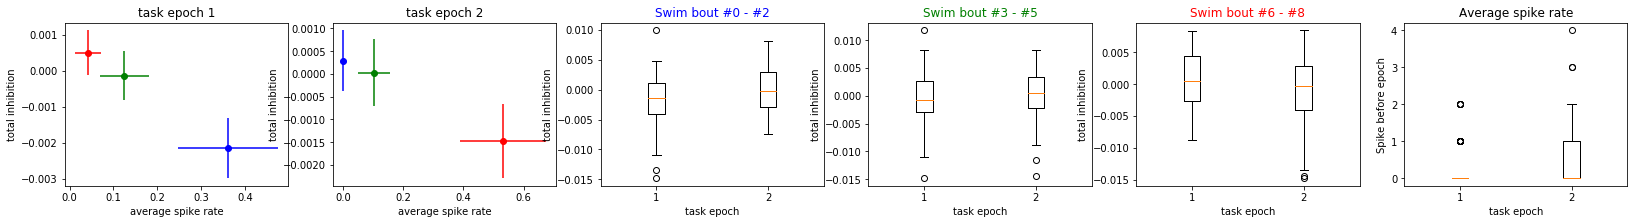

In [3]:
from activity_swim_bout import *
from utils import cont_mode
mean_spk_sub(dat_xls_file.iloc[0], isplot=True);
# error bar in the first two plots are sem

In [4]:
sns.set(font_scale=2, style='ticks')

In [5]:
spk_list = []
sub_list = []
spk_sig_list = []
sub_sig_list = []
spk_gain_list = []
sub_gain_list = []
for _, row in dat_xls_file.iterrows():
    spk, sub, spk_sig, sub_sig, spk_gain, sub_gain = mean_spk_sub(row)
    spk_list.append(spk)
    sub_list.append(sub)
    spk_sig_list.append(spk_sig)
    sub_sig_list.append(sub_sig)
    spk_gain_list.append(spk_gain)
    sub_gain_list.append(sub_gain)

Processing 03152018 Fish1-1
Processing 03152018 Fish4-1
Processing 03152018 Fish4-2
Processing 04052018 Fish4-1
Processing 04052018 Fish4-2
Processing 04122018 Fish2-1
Processing 04122018 Fish2-2
Processing 04122018 Fish4-1
Processing 04192018 Fish1-1
Processing 04192018 Fish1-2
Processing 04192018 Fish2-2
Processing 07262018 Fish2-1
Processing 07262018 Fish2-2
Processing 10182018 Fish3-1
Processing 11222018 Fish1-1
Processing 11222018 Fish1-2
Processing 11222018 Fish1-3
Processing 11222018 Fish2-1
Processing 11222018 Fish2-2
Processing 12202018 Fish3-2


In [6]:
task = []
for _, row in dat_xls_file.iterrows():
    task.append(row['task'][0])

In [38]:
from itertools import compress
task_R = [_=='R' for _ in task]
spk_list_R = list(compress(spk_list, task_R))
sub_list_R = list(compress(sub_list, task_R))
spk_sig_list_R = list(compress(spk_sig_list, task_R))
sub_sig_list_R = list(compress(sub_sig_list, task_R))

In [39]:
spk_list_R = np.concatenate(spk_list_R)
sub_list_R = np.concatenate(sub_list_R)
spk_sig_list_R = np.concatenate(spk_sig_list_R)
sub_sig_list_R = np.concatenate(sub_sig_list_R)

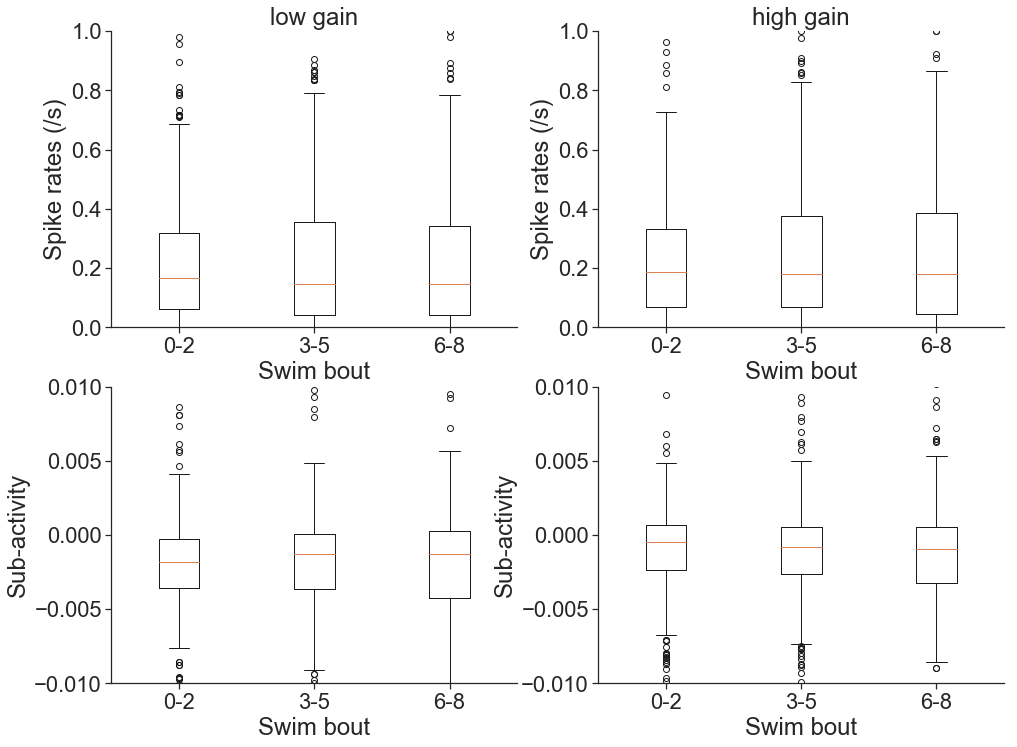

In [9]:
task_epoch = ['low gain', 'high gain']
xlabels = ['0-2', '3-5', '6-8']
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
for n_trial in range(2):
    spk_ = spk_list_R[:, n_trial, :]
    sub_ = sub_list_R[:, n_trial, :]
    ax[0, n_trial].boxplot(spk_, labels=xlabels)
    ax[1, n_trial].boxplot(sub_, labels=xlabels)
    ax[0, n_trial].set_title(task_epoch[n_trial])
    ax[0, n_trial].set_xlabel('Swim bout')
    ax[1, n_trial].set_xlabel('Swim bout')
    ax[0, n_trial].set_ylabel('Spike rates (/s)')
    ax[1, n_trial].set_ylabel('Sub-activity')
    ax[0, n_trial].set_ylim([0, 1])
    ax[1, n_trial].set_ylim([-0.01, 0.01])
    sns.despine()

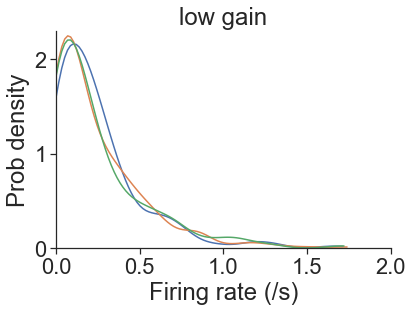

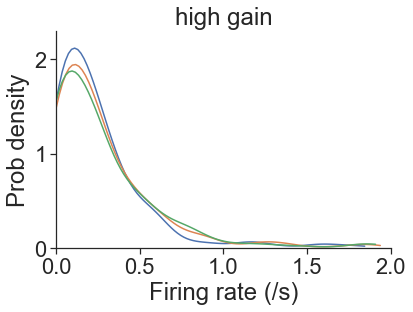

In [10]:
task_epoch = ['low gain', 'high gain']
for n_trial in range(2):
    spk_ = spk_list_R[:, n_trial, :]
    sub_ = sub_list_R[:, n_trial, :]
    hist_, bin_ = np.histogram(spk_)
    for nbout in range(3):
        cont_mode(spk_[:,nbout], isplot=True);
    plt.title(task_epoch[n_trial])
    plt.xlim([0, 2])
    plt.ylim([0, 2.3])
    plt.xlabel('Firing rate (/s)')
    plt.ylabel('Prob density')
    sns.despine()
    plt.show()

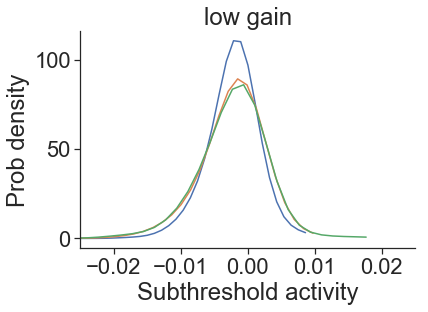

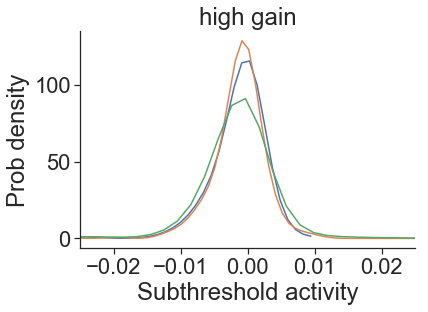

In [11]:
task_epoch = ['low gain', 'high gain']
for n_trial in range(2):
    spk_ = spk_list_R[:, n_trial, :]
    sub_ = sub_list_R[:, n_trial, :]
    hist_, bin_ = np.histogram(spk_)
    for nbout in range(3):
        cont_mode(sub_[:,nbout], isplot=True);
    plt.title(task_epoch[n_trial])
    plt.xlim([-0.025, 0.025])
    plt.xlabel('Subthreshold activity')
    plt.ylabel('Prob density')
    sns.despine()
    plt.show()

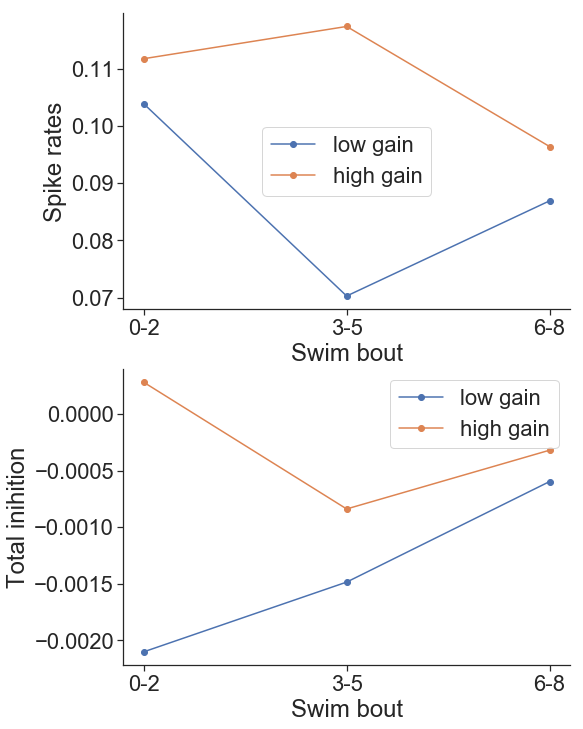

In [12]:
task_epoch = ['low gain', 'high gain']
xlabels = ['0-2', '3-5', '6-8']
fig, ax = plt.subplots(2, 1, figsize=(8, 12))
for n_trial in range(2):
    spk_ = spk_list_R[:, n_trial, :]
    sub_ = sub_list_R[:, n_trial, :]
    hist_, bin_ = np.histogram(spk_)
    spk_mode = []
    sub_mode = []
    for nbout in range(3):
        spk_mode.append(cont_mode(spk_[:,nbout]))
        sub_mode.append(cont_mode(sub_[:,nbout]))
    ax[0].plot(xlabels, spk_mode, '-o', label=task_epoch[n_trial])
    ax[1].plot(xlabels, sub_mode, '-o', label=task_epoch[n_trial])
    ax[0].set_ylabel('Spike rates')
    ax[1].set_ylabel('Total inihition')
    ax[0].set_xlabel('Swim bout')
    ax[1].set_xlabel('Swim bout')
    ax[0].legend()
    ax[1].legend()
    sns.despine()
plt.show()

In [13]:
# fig, ax = plt.subplots(2, 2, figsize=(8, 8))
# for n_trial in range(2):
#     spk_ = spk_list_R[:, n_trial, :]
#     sub_ = sub_list_R[:, n_trial, :]
#     hist_, bin_ = np.histogram(spk_)
#     ax[0, n_trial].plot(np.mean(spk_, axis=0))
#     ax[1, n_trial].plot(np.mean(sub_, axis=0))
#     ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
#     ax[0, n_trial].set_ylabel('Spike rates')
#     ax[1, n_trial].set_ylabel('Total inihition')

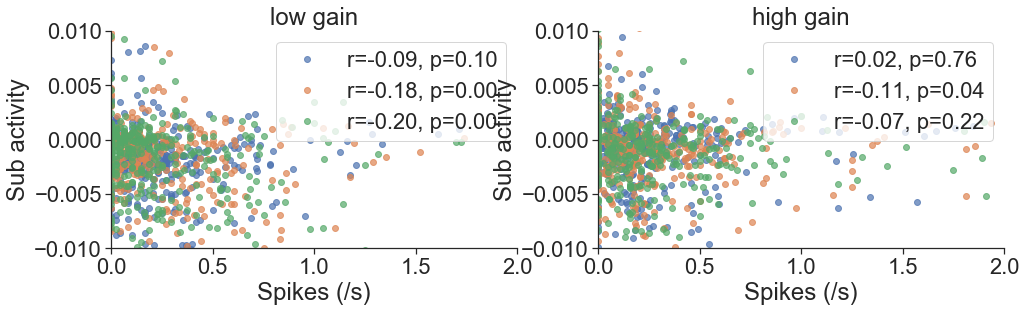

In [14]:
task_epoch = ['low gain', 'high gain']
from scipy.stats import spearmanr
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
for n_trial in range(2):
    for n_bout in range(3):
        spk_ = spk_list_R[:, n_trial, n_bout]
        sub_ = sub_list_R[:, n_trial, n_bout]
        r_, p_ = spearmanr(spk_, sub_)
        ax[n_trial].plot(spk_, sub_, 'o', alpha=0.7, label='r=%.2f, p=%0.2f'%(r_, p_))
        ax[n_trial].set_xlabel('Spikes (/s)')
        ax[n_trial].set_ylabel('Sub activity')
        ax[n_trial].set_xlim([0, 2])
        ax[n_trial].set_ylim([-0.01, 0.01])
        ax[n_trial].legend()
        ax[n_trial].set_title(task_epoch[n_trial])
        sns.despine()

In [15]:
# fig, ax = plt.subplots(2, 2, figsize=(8, 8))
# for n_trial in range(2):
#     spk_ = spk_list_R[:, n_trial, :]
#     sub_ = sub_list_R[:, n_trial, :]
#     ax[0, n_trial].plot(spk_.T, '-ok')
#     ax[1, n_trial].plot(sub_.T, '-ok')
#     ax[0, n_trial].set_title('Task type %d'%(n_trial+1))
#     ax[0, n_trial].set_ylabel('Spike rates')
#     ax[1, n_trial].set_ylabel('Total inihition')
#     ax[0, n_trial].set_ylim([0, 1])
#     ax[1, n_trial].set_ylim([-0.01, 0.01])

## Ramps up neurons and Ramp down neurons

#### Multi-test

In [16]:
from statsmodels.stats.multitest import multipletests

In [61]:
spk_ = spk_sig_list_R[:, 1, :].copy()
spk_[spk_==0]=np.nan
sig_thres = 0.1
p_vals_up = []
p_vals_down = [] 
for ncomp in range(2):
    up_p = 1-spk_[:, ncomp]
    up_p[np.isnan(up_p)] = 1
    down_p = spk_[:, ncomp]
    down_p[np.isnan(down_p)] = 1
    p_vals_up.append(multipletests(up_p, alpha=sig_thres, method='h')[0])
    p_vals_down.append(multipletests(down_p, alpha=sig_thres, method='h')[0])

In [62]:
sig_vec = (p_vals_up[0] & (~p_vals_down[1])) | (p_vals_up[1] & (~p_vals_down[0])) # ramp up neurons
# sig_vec = (p_vals_down[0] & (~p_vals_up[1])) | (p_vals_down[1] & (~p_vals_up[0])) # ramp down neurons

Number of ramp-up neurons 3


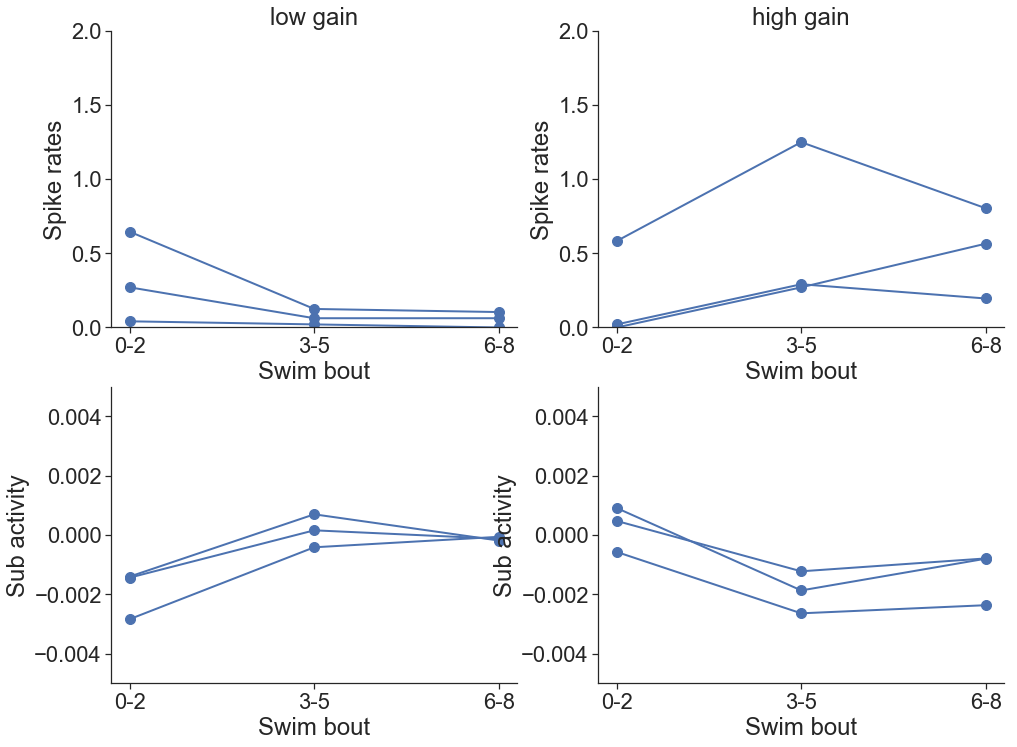

In [63]:
task_epoch = ['low gain', 'high gain']
xlabels = ['0-2', '3-5', '6-8']
print('Number of ramp-up neurons %d'%(sig_vec.sum()))
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
for n_trial in range(2):
    spk_ = spk_list_R[sig_vec, n_trial, :]
    sub_ = sub_list_R[sig_vec, n_trial, :]
    # ax[0, n_trial].plot((spk_/spk_[:,0][:,None]).T, '-b', lw=0.5)
    ax[0, n_trial].plot(xlabels, spk_.T, '-ob', lw=2, markersize=10)
#     ax[0, n_trial].plot(np.median(spk_, axis=0), '-ok', lw=2)
    ax[1, n_trial].plot(xlabels, sub_.T, '-ob', lw=2, markersize=10)
#     ax[1, n_trial].plot(np.median(sub_, axis=0), '-ok', lw=2)
    ax[0, n_trial].set_title(task_epoch[n_trial])
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[0, n_trial].set_xlabel('Swim bout')
    ax[1, n_trial].set_ylim([-0.005, 0.005])
    ax[0, n_trial].set_ylim([0, 2])
    ax[1, n_trial].set_ylabel('Sub activity')
    ax[1, n_trial].set_xlabel('Swim bout')
    sns.despine()
plt.show()

#### Without corrections

In [111]:
spk_ = spk_sig_list_R[:, 1, :].copy()
spk_[spk_==0]=np.nan
sig_thres = 0.05
p_vals_up = []
p_vals_down = [] 
for ncomp in range(2):
    up_p = 1-spk_[:, ncomp]
    down_p = spk_[:, ncomp]
    p_vals_up.append(up_p<sig_thres)
    p_vals_down.append(down_p<sig_thres)

In [112]:
sig_vec = (p_vals_up[0] & (~p_vals_down[1])) | (p_vals_up[1] & (~p_vals_down[0])) # ramp up neurons
# sig_vec = (p_vals_down[0] & (~p_vals_up[1])) | (p_vals_down[1] & (~p_vals_up[0])) # ramp down neurons

Number of ramp neurons 41


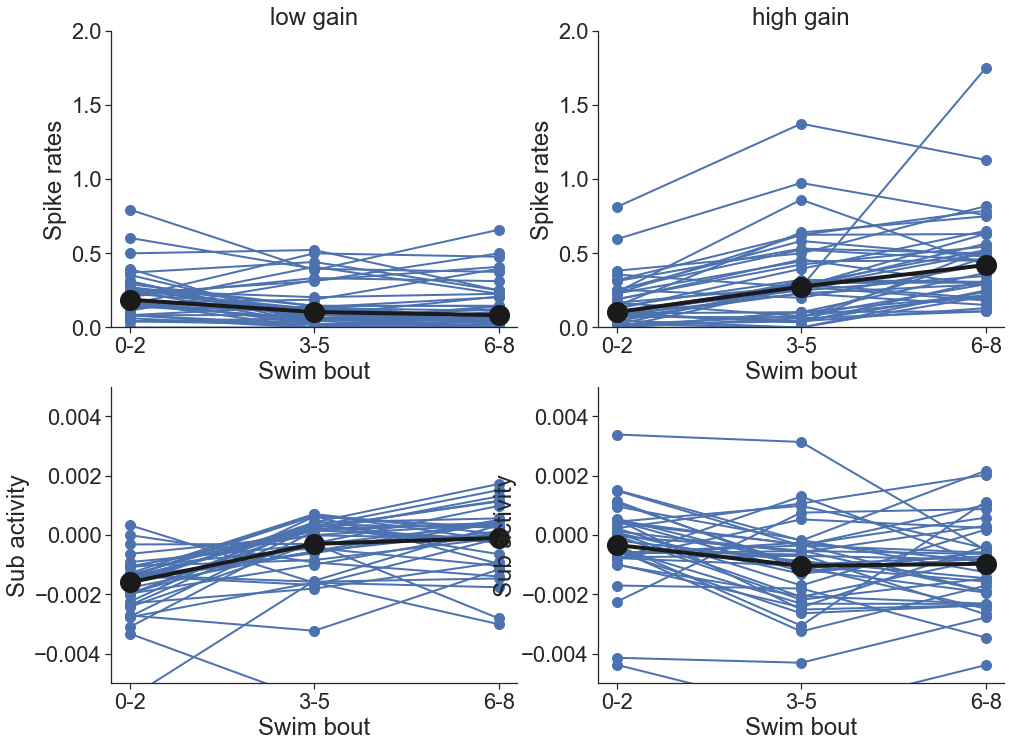

In [113]:
print('Number of ramp neurons %d'%(sig_vec.sum()))
task_epoch = ['low gain', 'high gain']
xlabels = ['0-2', '3-5', '6-8']
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
for n_trial in range(2):
    spk_ = spk_list_R[sig_vec, n_trial, :]
    sub_ = sub_list_R[sig_vec, n_trial, :]
    # ax[0, n_trial].plot((spk_/spk_[:,0][:,None]).T, '-b', lw=0.5)
    ax[0, n_trial].plot(xlabels, spk_.T, '-ob', lw=2, markersize=10)
    ax[0, n_trial].plot(np.median(spk_, axis=0), '-ok', lw=4, markersize=20)
    ax[1, n_trial].plot(xlabels, sub_.T, '-ob', lw=2, markersize=10)
    ax[1, n_trial].plot(np.median(sub_, axis=0), '-ok', lw=4, markersize=20)
    ax[0, n_trial].set_title(task_epoch[n_trial])
    ax[0, n_trial].set_ylabel('Spike rates')
    ax[0, n_trial].set_xlabel('Swim bout')
    ax[1, n_trial].set_ylim([-0.005, 0.005])
    ax[0, n_trial].set_ylim([0, 2])
    ax[1, n_trial].set_ylabel('Sub activity')
    ax[1, n_trial].set_xlabel('Swim bout')
    sns.despine()
plt.show()

## Fraction of subvoltage inhibition neuron

In [73]:
from itertools import compress
task_R = [_=='R' for _ in task]
spk_gain_list_R = list(compress(spk_gain_list, task_R))
sub_gain_list_R = list(compress(sub_gain_list, task_R))
spk_gain_list_R = np.concatenate(spk_gain_list_R)
sub_gain_list_R = np.concatenate(sub_gain_list_R)

#### Subvoltage is significantly differently in low and high gain

In [75]:
sub_analysis = sub_gain_list_R.copy()
sub_analysis[sub_analysis==1] = np.nan
sub_analysis[sub_analysis==0] = np.nan

In [84]:
sig_thres = 0.05
# up_sub = multipletests(1-sub_analysis, alpha=sig_thres, method='h')[0]
# down_sub = multipletests(sub_analysis, alpha=sig_thres, method='h')[0]
up_sub = 1-sub_analysis<sig_thres
down_sub = sub_analysis<sig_thres

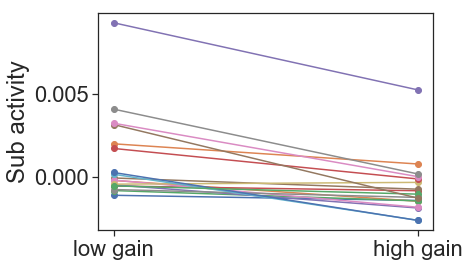

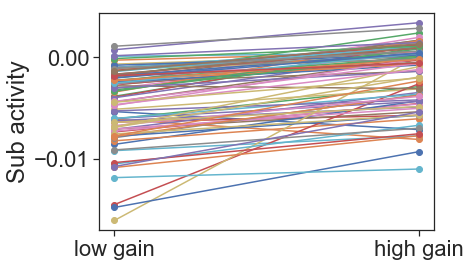

In [91]:
xlabels = ['low gain', 'high gain']
plt.plot(xlabels, sub_list_R[down_sub,:,:].mean(axis=-1).T, '-o', )
plt.ylabel('Sub activity')
plt.show()

xlabels = ['low gain', 'high gain']
plt.plot(xlabels, sub_list_R[up_sub,:,:].mean(axis=-1).T, '-o', )
plt.ylabel('Sub activity')
plt.show()

#### Subvoltage is significantly differently across swim bout in high gain

In [99]:
sub_ = sub_sig_list_R[:, 1, :].copy()
sub_[sub_==0]=np.nan
sub_[sub_==1]=np.nan
sig_thres = 0.05
p_vals_up = []
p_vals_down = [] 
for ncomp in range(2):
    up_p = 1-sub_[:, ncomp]
    down_p = sub_[:, ncomp]
    p_vals_up.append(up_p<sig_thres)
    p_vals_down.append(down_p<sig_thres)

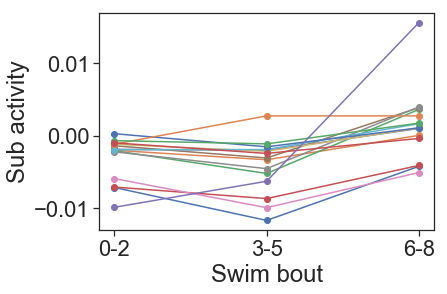

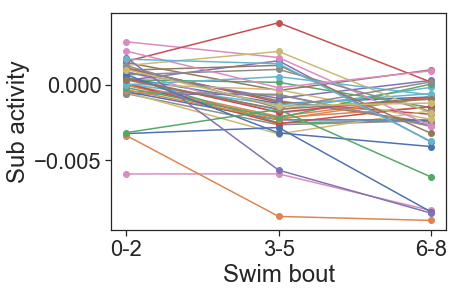

In [104]:
sig_vec = (p_vals_up[0] & (~p_vals_down[1])) | (p_vals_up[1] & (~p_vals_down[0])) # ramp up neurons
xlabels = ['0-2', '3-5', '6-8']
plt.plot(xlabels, sub_list_R[sig_vec,1,:].T, '-o', )
plt.ylabel('Sub activity')
plt.xlabel('Swim bout')
plt.show()

sig_vec = (p_vals_down[0] & (~p_vals_up[1])) | (p_vals_down[1] & (~p_vals_up[0])) # ramp down neurons
xlabels = ['0-2', '3-5', '6-8']
plt.plot(xlabels, sub_list_R[sig_vec,1,:].T, '-o', )
plt.ylabel('Sub activity')
plt.xlabel('Swim bout')
plt.show()

In [114]:
sub_ = sub_sig_list_R[:, 0, :].copy()
sub_[sub_==0]=np.nan
sub_[sub_==1]=np.nan
sig_thres = 0.05
p_vals_up = []
p_vals_down = [] 
for ncomp in range(2):
    up_p = 1-sub_[:, ncomp]
    down_p = sub_[:, ncomp]
    p_vals_up.append(up_p<sig_thres)
    p_vals_down.append(down_p<sig_thres)

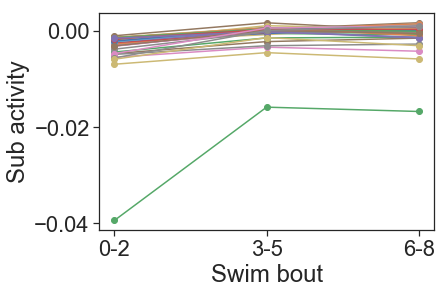

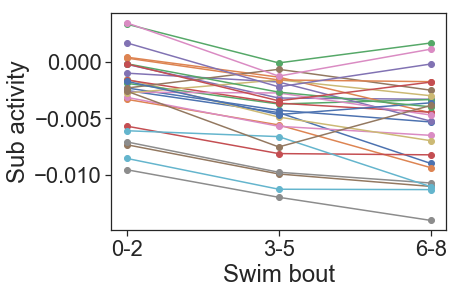

In [115]:
sig_vec = (p_vals_up[0] & (~p_vals_down[1])) | (p_vals_up[1] & (~p_vals_down[0])) # ramp up neurons
xlabels = ['0-2', '3-5', '6-8']
plt.plot(xlabels, sub_list_R[sig_vec,0,:].T, '-o', )
plt.ylabel('Sub activity')
plt.xlabel('Swim bout')
plt.show()

sig_vec = (p_vals_down[0] & (~p_vals_up[1])) | (p_vals_down[1] & (~p_vals_up[0])) # ramp down neurons
xlabels = ['0-2', '3-5', '6-8']
plt.plot(xlabels, sub_list_R[sig_vec,0,:].T, '-o', )
plt.ylabel('Sub activity')
plt.xlabel('Swim bout')
plt.show()

## Test neuron if modulated by gain

In [20]:
from itertools import compress
task_R = [_=='R' for _ in task]
spk_gain_list_R = list(compress(spk_gain_list, task_R))
sub_gain_list_R = list(compress(sub_gain_list, task_R))
spk_gain_list_R = np.concatenate(spk_gain_list_R)
sub_gain_list_R = np.concatenate(sub_gain_list_R)

In [24]:
# positive gain
thres_ = 0.05
spk_gain = spk_gain_list_R > 1-thres_
sum_ = spk_gain.sum()
print('Positive spike gain, total %d cells'%(sum_))
print('Positive spike gain, positive sub gain: %d cells'%((sub_gain_list_R[spk_gain]>1-thres_).sum()))
print('Positive spike gain, negative sub gain: %d cells'%((sub_gain_list_R[spk_gain]<thres_).sum()))

Positive spike gain, total 88 cells
Positive spike gain, positive sub gain: 21 cells
Positive spike gain, negative sub gain: 8 cells


In [ ]:
spk_gain = spk_gain_list_R < thres_
sum_ = spk_gain.sum()
print('Positive spike gain, total %d cells'%(sum_))
print('Positive spike gain, positive sub gain: %d cells'%((sub_gain_list_R[spk_gain]>1-thres_).sum()))
print('Positive spike gain, negative sub gain: %d cells'%((sub_gain_list_R[spk_gain]<thres_).sum()))